3. A plastics manufacturing plant has recorded their monthly sales data from 1949 to 1953. Perform forecasting on the data and bring out insights from it and forecast the sale for the next year. 

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importing dataset
df = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Time Series/Assignment/PlasticSales.csv')
df.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [5]:
df.shape

(60, 2)

In [6]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,60.0,1162.366667,266.431469,697.0,947.75,1148.0,1362.5,1637.0


In [7]:
# Datatypes of the feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
# checking for null values
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [9]:
# checking for duplicated values
df.duplicated().sum()

0

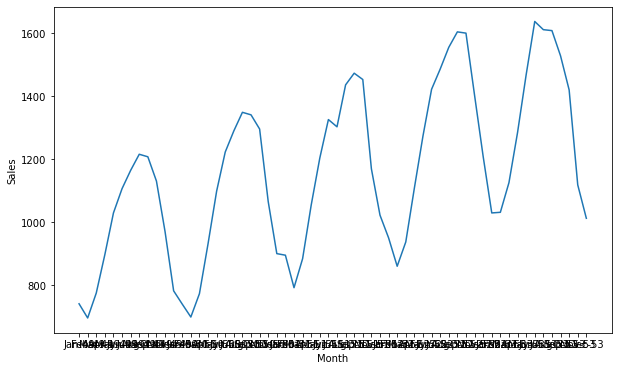

In [12]:
# Line plot 
plt.figure(figsize=(10,6))
sns.lineplot(x = df.Month, y = df.Sales)
plt.show()

    We can see an upward trend with seasonality

In [13]:
# Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df.Sales, autolag='AIC')
dfoutput = pd.Series(dftest, index=['Test Statistic', 'p-value', '#lags Used',\
                                       'Number of Observations Used','Critical Values','icbest'])
dfoutput

Test Statistic                                                         -0.742564
p-value                                                                 0.835414
#lags Used                                                                    10
Number of Observations Used                                                   49
Critical Values                {'1%': -3.5714715250448363, '5%': -2.922629480...
icbest                                                                550.312975
dtype: object

p-value is greater than 0.05 meaning we accept the null hypothesis. The variable is non-stationary

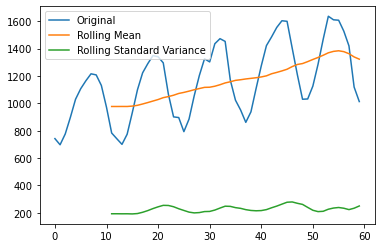

In [15]:
# Rolling Statistics

rolmean = df.Sales.rolling(window=12).mean()
rolvar = df.Sales.rolling(window=12).std()

plt.plot(df.Sales, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.show()

    We can see that the mean is not constant 

In [29]:
# Data Partition
Train = df.head(40)
Test = df.tail(20)

In [30]:
# Mean absolute Percentge Error
MAPE = np.mean(np.abs((rolmean.tail(8) - Test.Sales)/Test.Sales)*100)
MAPE

14.578913486939681

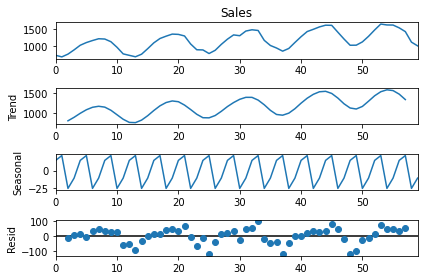

In [31]:
# Decomposing the data to see trend, seasonality using additive model
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(df.Sales, model = "additive", period = 4)

ds_trend = (decompose_ts_add.trend)
ds_seasonal = (decompose_ts_add.seasonal)
ds_resid = (decompose_ts_add.resid)
ds_obser = (decompose_ts_add.observed)

decompose_ts_add.plot()
plt.show()

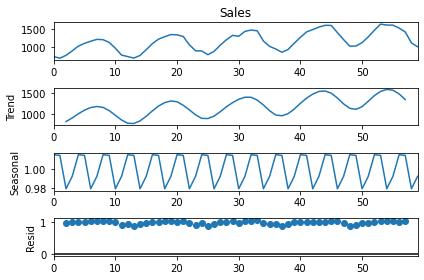

In [32]:
# Decomposing the data to see trend, seasonality using multiplicative model
decompose_ts_mul = seasonal_decompose(df.Sales, model = "multiplicative", period = 4)
decompose_ts_mul.plot()
plt.show()

E:\ANACONDA\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


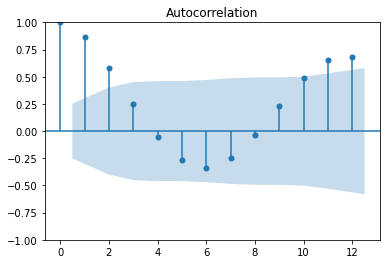

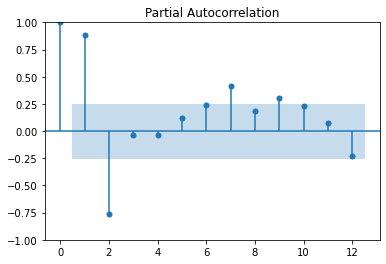

In [33]:
# ACF and PACF plot on Original data sets 

import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(df.Sales, lags = 12)
tsa_plots.plot_pacf(df.Sales, lags = 12)
plt.show()

In [34]:
# Simple Exponential Method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 

ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE_ses = np.mean(np.abs((pred_ses - Test.Sales)/Test.Sales)*100)
MAPE_ses 

19.47515210356732

In [41]:
# Holt Method
from statsmodels.tsa.holtwinters import Holt

holt_model = Holt(Train.Sales).fit()
pred_holt = holt_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE_holt = np.mean(np.abs((pred_holt - Test.Sales) / Test.Sales)*100)
MAPE_holt 

119.36572619017848

In [39]:
# Holts winter exponential smoothing with additive seasonality and additive trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

hwe_model_add_add = ExponentialSmoothing(Train["Sales"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE_hwe_add_add = np.mean(np.abs((pred_hwe_add_add - Test.Sales) / Test.Sales)*100)
MAPE_hwe_add_add

8.03004156803022

In [40]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train["Sales"], seasonal = "mul", trend = "add", seasonal_periods = 12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE_hwe_mul_add = np.mean(np.abs((pred_hwe_mul_add - Test.Sales) / Test.Sales)*100)
MAPE_hwe_mul_add

7.261489375748188

In [43]:
# Final Model on 100% Data
hwe_fmodel_mul_add = ExponentialSmoothing(df.Sales, seasonal = "mul", trend = "add", seasonal_periods = 12).fit()

In [44]:
df.tail()

,Month,Sales
55,Aug-53,1608
56,Sep-53,1528
57,Oct-53,1420
58,Nov-53,1119
59,Dec-53,1013


In [45]:
# Predicting for next 1 year

Pred_Table = pd.DataFrame(data=['Jan-54','Feb-54','Mar-54','Apr-54','May-54','Jun-54',\
                                'Jul-54','Aug-54','Sep-54','Oct-54','Nov-54','Dec-54'], \
                                 index=range(60,72), columns=['Month'])
Pred_Table

,Month
60,Jan-54
61,Feb-54
62,Mar-54
63,Apr-54
64,May-54
65,Jun-54
66,Jul-54
67,Aug-54
68,Sep-54
69,Oct-54


In [46]:
Pred_Table['Sales'] = hwe_fmodel_mul_add.predict(start = Pred_Table.index[0], end = Pred_Table.index[-1])
Pred_Table.Sales

60     888.968638
61     817.986881
62     882.318921
63    1012.060381
64    1139.760600
65    1235.016065
66    1230.935526
67    1256.139906
68    1226.445829
69    1157.781940
70     939.977669
71     791.479386
Name: Sales, dtype: float64

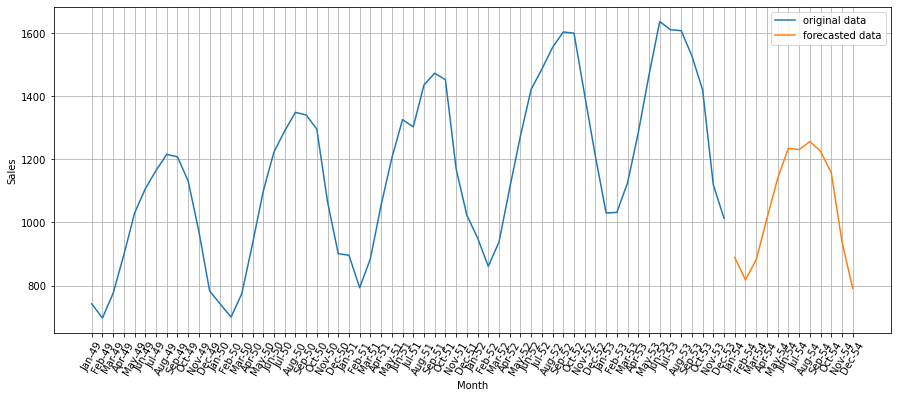

In [51]:
# Plotting forecasted and original data
plt.figure(figsize=(15,6))
sns.lineplot(y = df.Sales, x = df.Month, label = 'original data')
sns.lineplot(y = Pred_Table.Sales, x = Pred_Table.Month, label = 'forecasted data')
plt.xticks(rotation = 60)
plt.legend(loc='best')
plt.grid('on')
plt.show()

# ARIMA MODEL

In [53]:
# Lets use ARIMA model

import pmdarima as pm                # Using pmdarima for auto arima to find optimal orders

ar_model = pm.auto_arima(Train.Sales, start_p=0, start_q=0,
                      max_p=12, max_q=12,                
                      m=1,                               
                      d=None,                            
                      seasonal=True,                    
                      start_P=0, trace=True,
                      error_action='warn', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=549.736, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=499.465, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=674.355, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=469.079, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=468.504, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=469.785, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=470.449, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=471.524, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=471.759, Time=0.23 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=487.247, Time=0.04 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.953 seconds


.

In [64]:
# ARIMA with AR=3, I = 0, MA = 0
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(Train.Sales, order = (3,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -229.247
Date:                Sat, 06 Aug 2022   AIC                            468.494
Time:                        18:45:57   BIC                            476.938
Sample:                             0   HQIC                           471.547
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1077.9291     45.660     23.608      0.000     988.437    1167.421
ar.L1          1.3184      0.165      7.977      0.000       0.994       1.642
ar.L2         -0.3868      0.252     -1.535      0.1

In [68]:
# Predicting for test data

test_pred = res.predict(start = Test.index[0], end = Test.index[-1])

# Checking for MAPE
MAPE_arima = np.mean(np.abs((test_pred - Test.Sales) / Test.Sales)*100)
MAPE_arima

18.19822693230154

In [69]:
# Fitting on 100% data

f_model = ARIMA(df.Sales, order = (3,0,0))
f_res = f_model.fit()

Pred_Table['ARIMA_Sales'] = f_res.predict(start = Pred_Table.index[0], end = Pred_Table.index[-1])
Pred_Table.ARIMA_Sales

60     926.765161
61     906.471132
62     939.267746
63    1011.335602
64    1101.802615
65    1189.779817
66    1258.173059
67    1296.537611
68    1302.072672
69    1278.952512
70    1236.375774
71    1185.930190
Name: ARIMA_Sales, dtype: float64

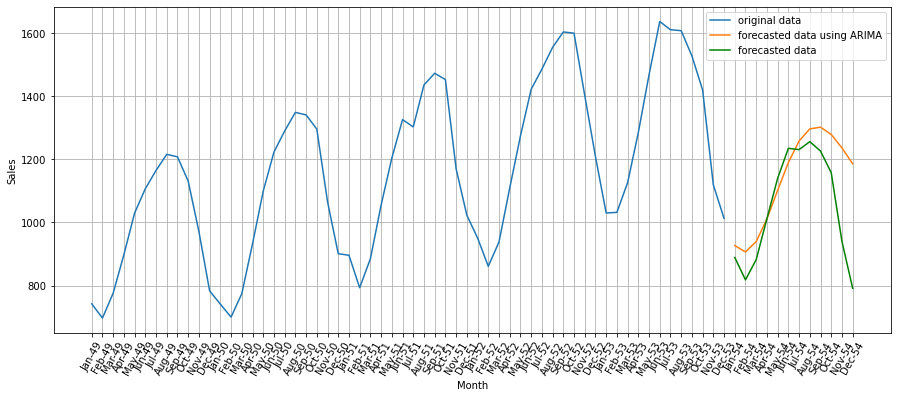

In [72]:
# Plotting forecasted and original data using ARIMA model

plt.figure(figsize=(15,6))
sns.lineplot(y = df.Sales, x = df.Month, label = 'original data')
sns.lineplot(y = Pred_Table.ARIMA_Sales, x = Pred_Table.Month, label = 'forecasted data using ARIMA')
sns.lineplot(y = Pred_Table.Sales, x = Pred_Table.Month, label = 'forecasted data',color = 'g' )
plt.xticks(rotation = 60)
plt.legend(loc='best')
plt.grid('on')
plt.show()

Using ARIMA model we get more residual error as compared to Exponential Smoothing